<a href="https://colab.research.google.com/github/yanliu1111/AlgoExpert-Easy/blob/main/using_copilot_with_jupyter_notebooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the Titanic Dataset
## Introduction
The Titanic dataset is a classic dataset used in many machine learning tutorials. It contains information about the passengers on the Titanic, including whether they survived or not. In this notebook, we will explore the Titanic dataset and try to answer some questions about the passengers on the Titanic. We will also build a simple machine learning model to predict whether a passenger survived or not.

In [1]:
# under python 3.10, you need to install pandas package in bash `python -m pip install pandas`
import pandas as pd
url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv"
data = pd.read_csv(url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


q: what is the meaning of SibSp and Parch in the dataset?

a: SibSp is the number of siblings/spouses aboard the Titanic, and Parch is the number of parents/children aboard the Titanic.

q: what is the meaning of Embarked in the dataset?

a: Embarked is the port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

In [2]:
# let's compute how many passengers survived and print the result
survived = data['Survived'].sum()
print(f"Number of passengers survived: {survived}")

# let's compute the percentage of passengers who have not survived and print the result
not_survived = data['Survived'].count() - survived
print(f"Number of passengers who have not survived: {not_survived}")

# let's compute the percentage of passengers who have not survived and print the result
print (f"Percentage of passengers who have not survived: {not_survived/data['Survived'].count()*100:.2f}%")

Number of passengers survived: 342
Number of passengers who have not survived: 549
Percentage of passengers who have not survived: 61.62%


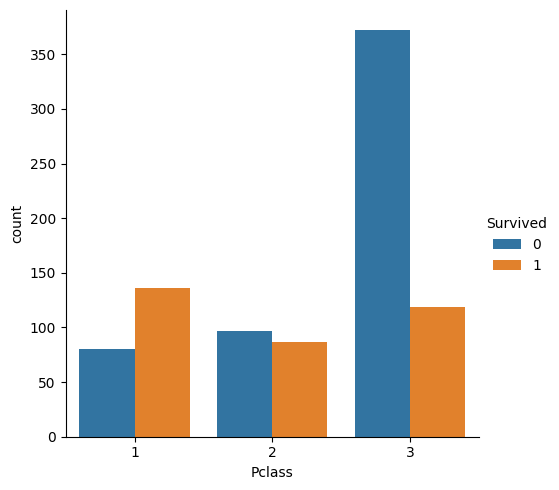

In [3]:
# Let's look at the correlation between the column Survived and the other Pclass
# And visualize the number of people per each class survived or not with a catplot
import seaborn as sns
sns.catplot(x='Pclass', hue='Survived', kind='count', data=data)

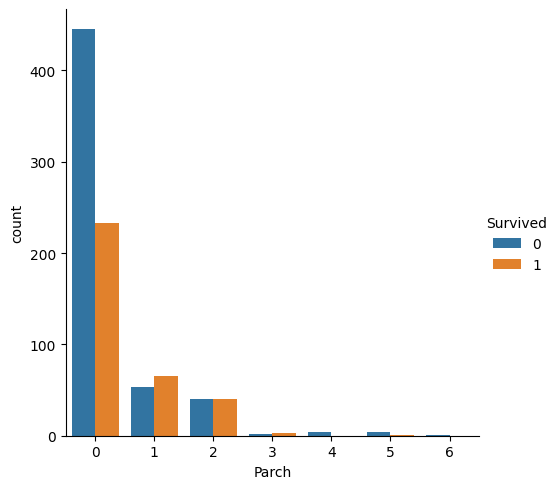

In [4]:
# Let's look at how survival varies, depending on whether you had parents or children on board
sns.catplot(x='Parch', hue='Survived', kind='count', data=data)

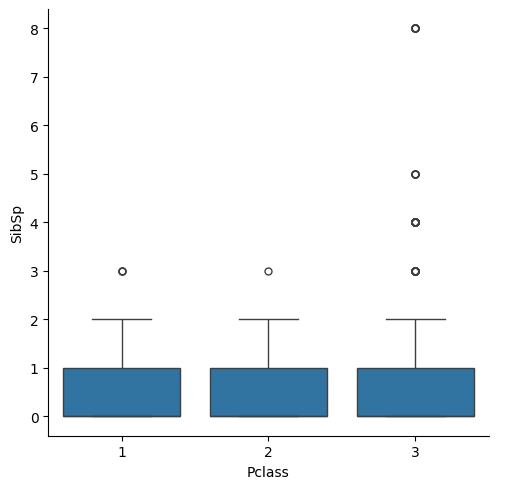

In [5]:
# Let's see if those with different ticket types tended to be in different sized families. A box and whisker is a nice alternative to histograms when we want to look at the spread of data.
sns.catplot(x='Pclass', y='SibSp', kind='box', data=data)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

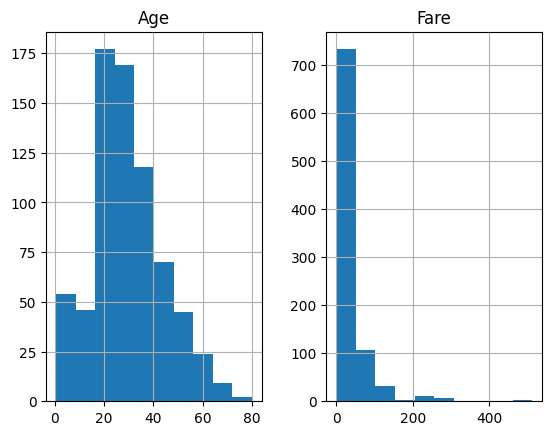

In [6]:
# Our dataset has Age and Fare columns, which are continuous. We can use a histogram to visualize the distribution of these columns.
data[['Age', 'Fare']].hist()

<Axes: xlabel='Age', ylabel='Fare'>

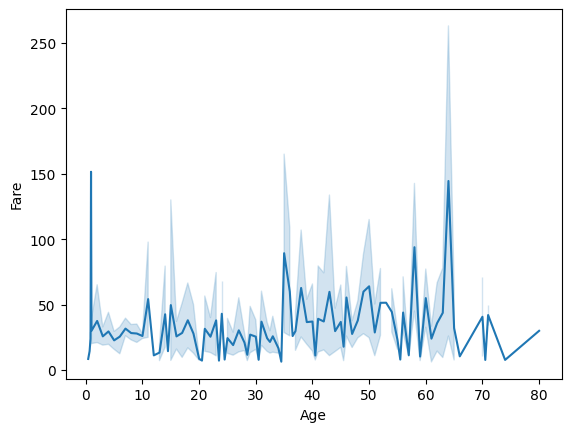

In [7]:
# Compare the age distribution for average fare paid in a line plot
sns.lineplot(x='Age', y='Fare', data=data)

#### Does the cost of a fare or a person's age have any relationship with survival?

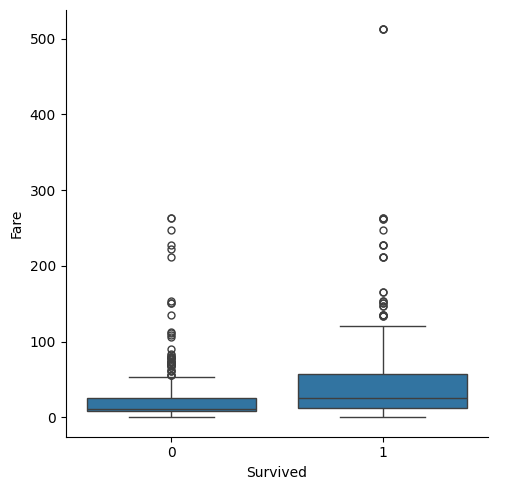

In [8]:
# Plot Fare vs Survival
sns.catplot(x='Survived', y='Fare', kind='box', data=data)

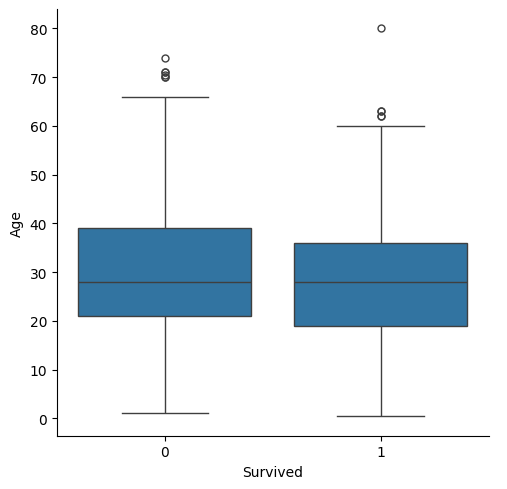

In [9]:
# Plot Age vs Survival
sns.catplot(x='Survived', y='Age', kind='box', data=data)

# Visualising Categorical Data
## Our Titanic dataset have the following categorical columns:

- Sex (Male, Female)
- Embarked - the port of ambarkation (C, Q, or S)
- Survival (0 = no, 1 = yes)
  
Categorical data are usually viewable in a similar way to ordinal data, but with data viewed as order-less groups. Alternatively, categories appear as colours or groups in other kinds of plots.

Plotting categorical data against other categorical data lets us see how data is clustered. This is little more than a coloured table. Let's do this now:

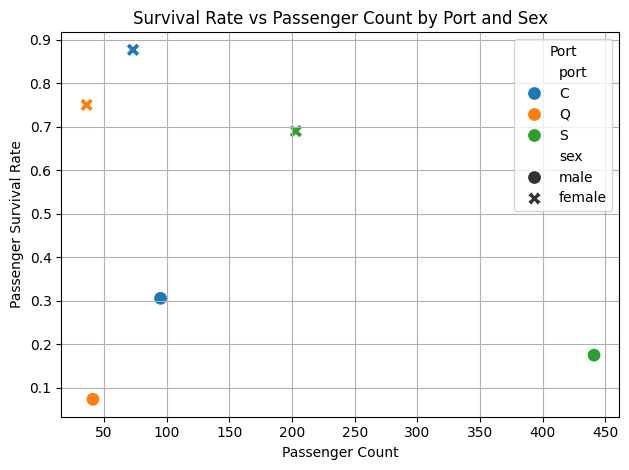

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# Create some simple functions
# Read their descriptions to find out more
# Returns rows that match in terms of sex and embarkment port
def get_rows(sex, port):
    return data[(data.Embarked == port) & (data.Sex == sex)]
def proportion_survived(sex, port):
    '''Returns the proportion of people meeting criteria who survived'''
    survived = get_rows(sex, port).Survived
    return np.mean(survived)
# Make two columns of data - together these represent each combination
# of sex and embarkment port
sexes = ["male", "male", "male", "female","female", "female"]
ports = ["C", "Q", "S" ] * 2
# Calculate the number of passengers at each port + sex combination
passenger_count = [len(get_rows(sex, port)) for sex, port in zip(sexes, ports)]

# Calculate survival proportion for each combination
passenger_survival = [proportion_survived(sex, port) for sex, port in zip(sexes, ports)]

# Combine results into a single DataFrame
table = pd.DataFrame({
    "sex": sexes,
    "port": ports,
    "passenger_count": passenger_count,
    "passenger_survival_rate": passenger_survival
})

# Plot the data
sns.scatterplot(
    data=table,
    x="passenger_count",
    y="passenger_survival_rate",
    hue="port",
    style="sex",  # Adding style differentiation by sex
    s=100  # Adjusting point size for better visibility
)

# Customize the plot
plt.title("Survival Rate vs Passenger Count by Port and Sex")
plt.xlabel("Passenger Count")
plt.ylabel("Passenger Survival Rate")
plt.legend(title="Port")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()